In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("reading_data/superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.isnull().sum() #boş veri varmı?

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
df["Order ID"].count()  #kaç adet order ID var?

9800

In [6]:
df["Sub-Category"].value_counts() #Statelerin kaç kere kullanıldığı

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [7]:
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [8]:
df["State"].nunique()  #Kaç faraklı state var?

49

In [9]:
df.groupby("Category")["State"].count()   #Kategori içindeki verilerin dağılımı 

Category
Furniture          2078
Office Supplies    5909
Technology         1813
Name: State, dtype: int64

In [10]:
df["Category"].value_counts()   #Buda aynısı

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [11]:
plt.style.use('default')

In [12]:
df.shape

(9800, 18)

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [14]:
df.nunique()  # unique veri sayısı

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [15]:
df["Region"].value_counts() #Region içindeki dağılımlar

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

In [16]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [17]:
df.describe().T  #sayısal değişkenler

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [18]:
dff = df.drop(["Row ID","Order ID","Customer ID","Product ID"],axis=1) #4 sütun sildik

In [19]:
dff.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [20]:
dff.nunique()

Order Date       1230
Ship Date        1326
Ship Mode           4
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [21]:
dff.isnull().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [22]:
dff[dff["Postal Code"].isnull()]  #eksik veriler geldi

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [23]:
dff["Postal Code"]=dff["Postal Code"].fillna(5402) #boş yerleri doldurduk 

In [24]:
dff.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [25]:
dff.iloc[9741]

Order Date                                              08/11/2016
Ship Date                                               12/11/2016
Ship Mode                                           Standard Class
Customer Name                                         Quincy Jones
Segment                                                  Corporate
Country                                              United States
City                                                    Burlington
State                                                      Vermont
Postal Code                                                 5402.0
Region                                                        East
Category                                                 Furniture
Sub-Category                                             Bookcases
Product Name     Riverside Palais Royal Lawyers Bookcase, Royal...
Sales                                                       4404.9
Name: 9741, dtype: object

In [26]:
dff[dff["State"]=="Vermont"].head() #State sütunu vermont olanları getirme

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,5402.0,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5402.0,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,5402.0,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5402.0,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5402.0,East,Office Supplies,Art,4009 Highlighters,8.04


In [27]:
#ay sütunu oluşturma tarihteki ay sayısını alıp yeni sütuna ekleme
dff["Month"] = dff["Order Date"].str[3:5]
dff.head()  #int olmadı   #burada string olarak çektik

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,06
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10


In [28]:
dff["Month"] = dff["Month"].astype("int32")
dff.head()  #bu kod ile integer'a dönüştürdük
#int olduğu için başlardaki 0 lar silindi 06 sadece 6 ya dönüştü

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10


In [29]:
dff.dtypes

Order Date        object
Ship Date         object
Ship Mode         object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Month              int32
dtype: object

In [30]:
#Ayları isimlere dönüştürme
d = {1:"Ocak",2:"Şubat",3:"Mart",4:"Nisan",5:"Mayıs",6:"Haziran",7:"Temmuz",8:"Ağustos",9:"Eylül",10:"Ekim",11:"Kasım",12:"Aralık",}

In [31]:
d

{1: 'Ocak',
 2: 'Şubat',
 3: 'Mart',
 4: 'Nisan',
 5: 'Mayıs',
 6: 'Haziran',
 7: 'Temmuz',
 8: 'Ağustos',
 9: 'Eylül',
 10: 'Ekim',
 11: 'Kasım',
 12: 'Aralık'}

In [32]:
d[11]

'Kasım'

In [33]:
dff["Month"] = [d[i] for i in dff["Month"]]  #sayısal verileri kategorilere dönüştürdük

In [34]:
dff["Month"].unique()

array(['Kasım', 'Haziran', 'Ekim', 'Nisan', 'Aralık', 'Mayıs', 'Ağustos',
       'Temmuz', 'Eylül', 'Ocak', 'Mart', 'Şubat'], dtype=object)

In [35]:
dff.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Kasım
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Kasım
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Haziran
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Ekim
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Ekim


In [36]:
dff["Order Date"] = pd.to_datetime(dff["Order Date"])  #datetime türüne çevirdik

C:\Users\orkun\AppData\Local\Temp\ipykernel_13744\1275559545.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dff["Order Date"] = pd.to_datetime(dff["Order Date"])  #datetime türüne çevirdik


In [37]:
dff.iloc[0:2]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,2017-08-11,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,Kasım
1,2017-08-11,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,Kasım


In [38]:
dff["Ship Date"] = pd.to_datetime(dff["Ship Date"])  #datetime türüne çevirdik

C:\Users\orkun\AppData\Local\Temp\ipykernel_13744\1967937080.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dff["Ship Date"] = pd.to_datetime(dff["Ship Date"])  #datetime türüne çevirdik


In [39]:
dff.iloc[0:2]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,Kasım
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,Kasım


In [40]:
dff["Year"] = dff["Order Date"].dt.year  #datetime a çevirip day/month/year yazarak veriyi çekebiliriz
dff.loc[0:2]  

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,Kasım,2017
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,Kasım,2017
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,Haziran,2017


In [41]:
dff["Year"].value_counts()  #yıllara göre satış 

2018    3258
2017    2534
2016    2055
2015    1953
Name: Year, dtype: int64

In [42]:
dff["Month"].value_counts() #satış miktarı değil sadece sayı öğreniyoruz burada

Kasım      1449
Aralık     1382
Eylül      1354
Ekim        809
Mayıs       725
Temmuz      697
Ağustos     693
Haziran     691
Mart        680
Nisan       657
Ocak        366
Şubat       297
Name: Month, dtype: int64

In [43]:
#hangi ayda satış fazla
months_df = dff.groupby("Month").sum()
months_df

C:\Users\orkun\AppData\Local\Temp\ipykernel_13744\1568400726.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  months_df = dff.groupby("Month").sum()


,Postal Code,Sales,Year
Month,,,
Aralık,79735933.0,321480.1695,2787094
Ağustos,39887477.0,157315.9270,1397545
Ekim,46963820.0,199496.2947,1631565
Eylül,71845070.0,300103.4117,2730652
Haziran,37001159.0,145837.5233,1393591
Kasım,79477024.0,350161.7110,2922156
Mart,37422279.0,197573.5872,1371361
Mayıs,39303261.0,154086.7237,1462180
Nisan,34472176.0,136283.0006,1324950


In [44]:
#aylara göre satış tutarları
months_dff = months_df[["Sales"]]
months_dff

,Sales
Month,
Aralık,321480.1695
Ağustos,157315.9270
Ekim,199496.2947
Eylül,300103.4117
Haziran,145837.5233
Kasım,350161.7110
Mart,197573.5872
Mayıs,154086.7237
Nisan,136283.0006


In [45]:
months_dff.reset_index(inplace=True)  #index verdik 1 kere çalıştırılmalı kod
months_dff

,Month,Sales
0,Aralık,321480.1695
1,Ağustos,157315.9270
2,Ekim,199496.2947
3,Eylül,300103.4117
4,Haziran,145837.5233
5,Kasım,350161.7110
6,Mart,197573.5872
7,Mayıs,154086.7237
8,Nisan,136283.0006
9,Ocak,94291.6296


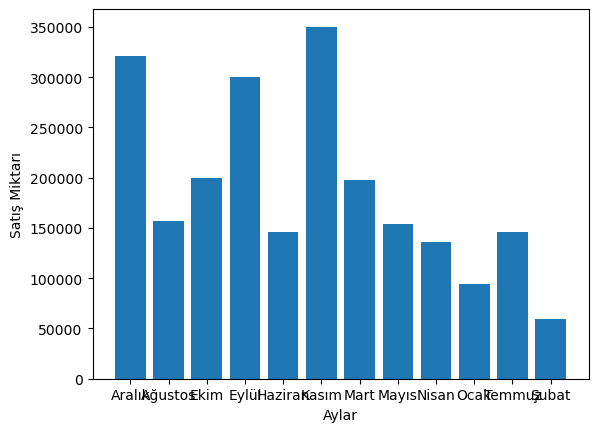

In [46]:
plt.bar(months_dff["Month"],months_dff["Sales"])
plt.xlabel("Aylar")
plt.ylabel("Satış Miktarı")
plt.show()

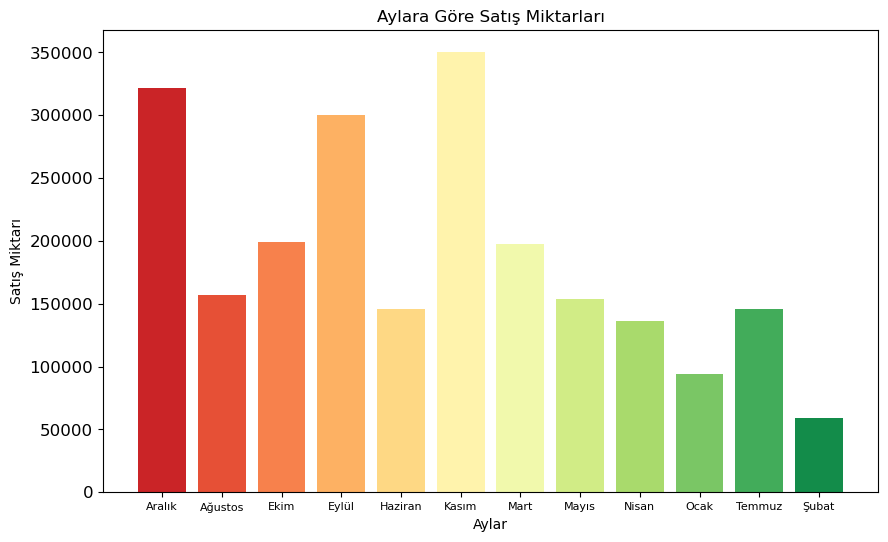

In [47]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("RdYlGn", len(dff["Month"].unique()))
plt.bar(months_dff["Month"],months_dff["Sales"], color=colors)
plt.title("Aylara Göre Satış Miktarları")
plt.xticks(fontsize=8, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("Aylar")
plt.ylabel("Satış Miktarı")
plt.show()

In [48]:
year_df = dff.groupby("Year").sum()
year_df = year_df[["Sales"]]
year_df

C:\Users\orkun\AppData\Local\Temp\ipykernel_13744\2839187002.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_df = dff.groupby("Year").sum()


,Sales
Year,
2015,479856.2081
2016,459436.0054
2017,600192.5500
2018,722052.0192


In [49]:
year_df.reset_index(inplace=True)  #index verdik 1 kere çalıştırılmalı kod
year_df

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


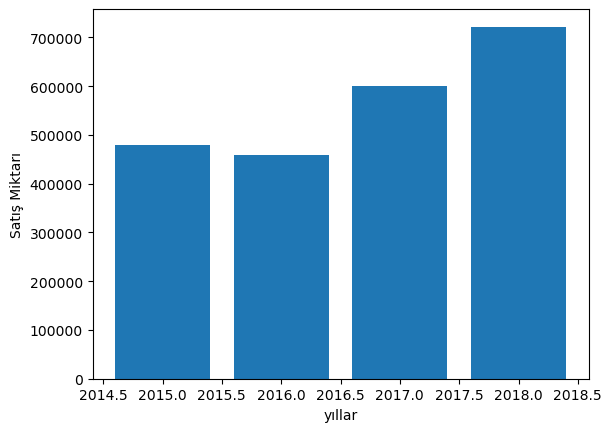

In [50]:
plt.bar(year_df["Year"],year_df["Sales"])
plt.xlabel("yıllar")
plt.ylabel("Satış Miktarı")
plt.show()

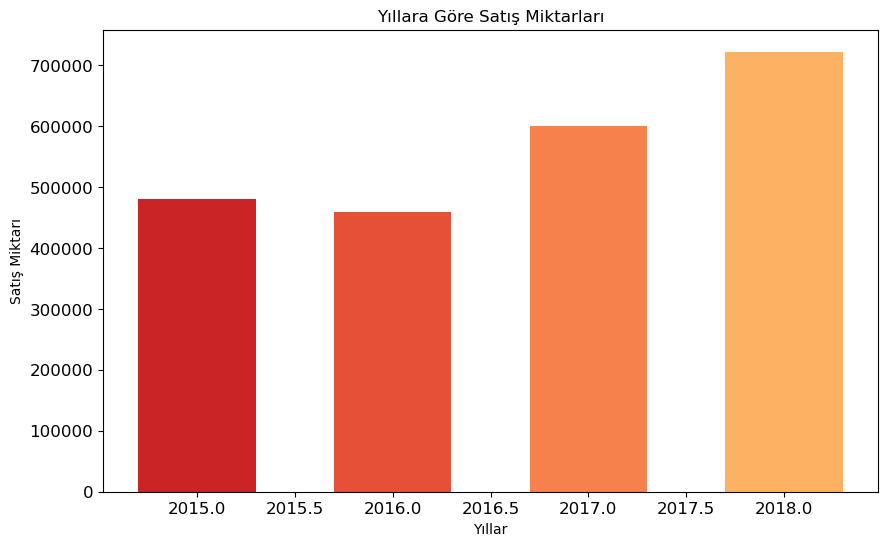

In [51]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("RdYlGn", len(dff["Month"].unique()))
plt.bar(year_df["Year"],year_df["Sales"], color=colors,width=0.6)
plt.title("Yıllara Göre Satış Miktarları")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("Yıllar")
plt.ylabel("Satış Miktarı")
plt.show()

In [52]:
dff.iloc[0:2]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,Kasım,2017
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,Kasım,2017


In [53]:
customer = dff.groupby("Customer Name").sum().sort_values("Sales",ascending=False) #büyükten küçüğe sıraladık
#böylece yazarsak posta kodu ve yıl veriside geliyor bunları silmemiz gerekiyor
customer.drop(["Postal Code","Year"],axis=1,inplace=True) # customer = customer[["Sales"]] az önce böyle yapmıştık
customer.head() # bir yöntemde gizliyoruz diğerinde siliyoruz

C:\Users\orkun\AppData\Local\Temp\ipykernel_13744\2178890673.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer = dff.groupby("Customer Name").sum().sort_values("Sales",ascending=False) #büyükten küçüğe sıraladık


,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571


In [54]:
customer.reset_index(inplace=True)  #index verdik 1 kere çalıştırılmalı kod bu kod index verir
customer #büyükten küçüğe index verip sıraladık

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
...,...,...
788,Mitch Gastineau,16.739
789,Carl Jackson,16.520
790,Sung Chung,14.112
791,Lela Donovan,5.304


In [55]:
customer = customer.head(20)  #en yüksek 20 kişinin verisini çektik
customer

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


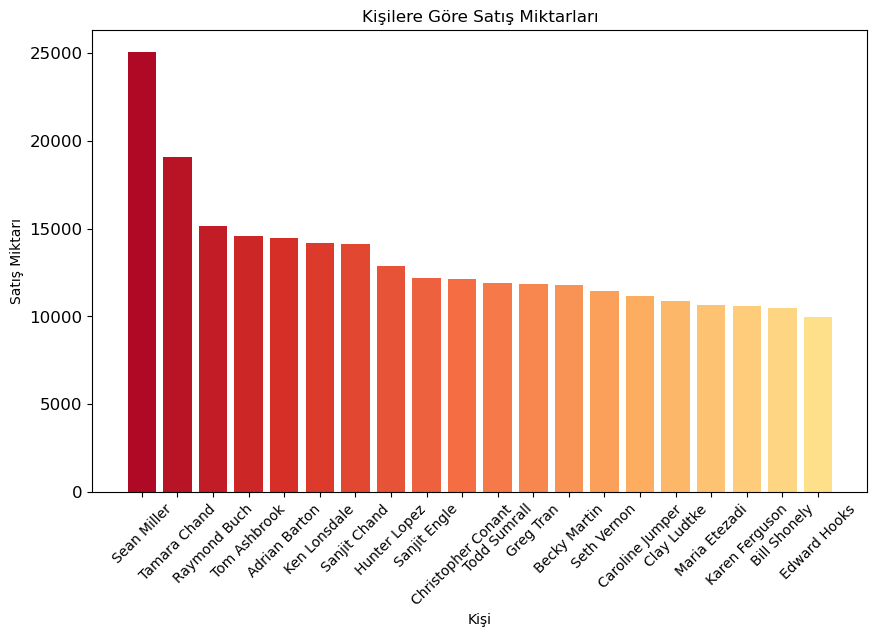

In [56]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("RdYlGn", len(dff["State"].unique()))
plt.bar(customer["Customer Name"],customer["Sales"], color=colors)
plt.title("Kişilere Göre Satış Miktarları")
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("Kişi")
plt.ylabel("Satış Miktarı")
plt.show()

In [57]:
dff.nunique()  # unique değerlere göre renk paleti belirledik

Order Date       1230
Ship Date        1326
Ship Mode           4
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       627
Region              4
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
Month              12
Year                4
dtype: int64

In [58]:
category = dff.groupby("Category").sum()
category.drop(["Postal Code","Year"],axis=1,inplace=True)
category

C:\Users\orkun\AppData\Local\Temp\ipykernel_13744\365211607.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category = dff.groupby("Category").sum()


,Sales
Category,
Furniture,728658.5757
Office Supplies,705422.3340
Technology,827455.8730


In [59]:
category.reset_index(inplace=True)
category

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


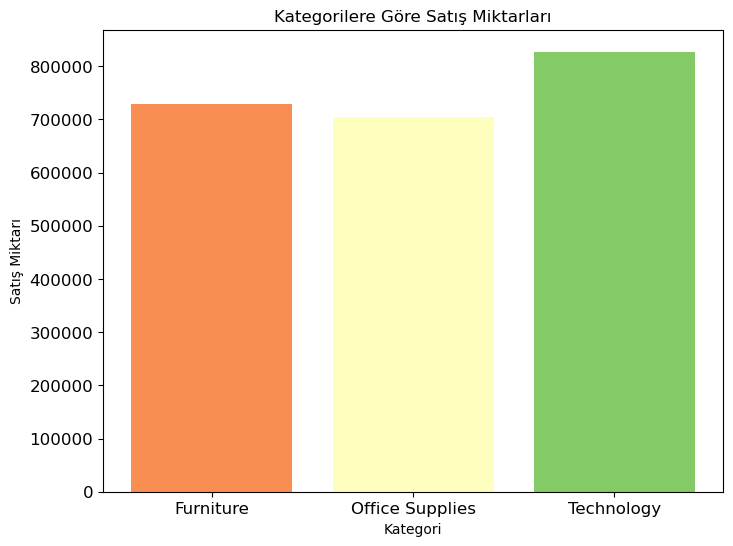

In [60]:
plt.figure(figsize=(8, 6))
colors = sns.color_palette("RdYlGn", len(dff["Category"].unique()))
plt.bar(category["Category"],category["Sales"], color=colors)
plt.title("Kategorilere Göre Satış Miktarları")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("Kategori")
plt.ylabel("Satış Miktarı")
plt.show()

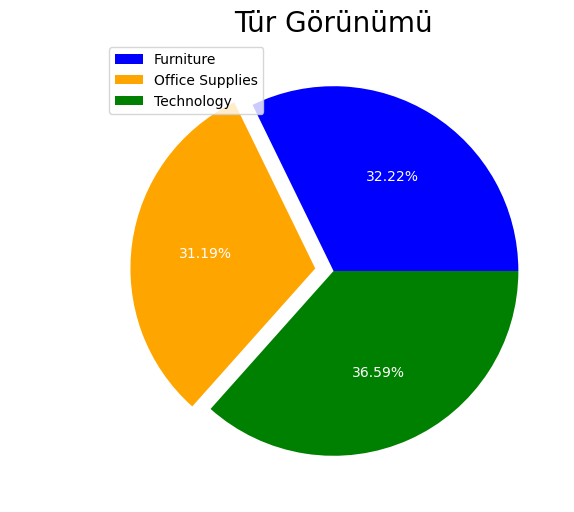

In [61]:
plt.figure(figsize=(8, 6))
labels = ["Furniture","Office Supplies","Technology"]
plt.pie(category["Sales"],labels=category["Category"], autopct='%1.2f%%', explode =[0,0.1,0],textprops={'color': 'white'}, colors=["blue","orange","green"])
plt.title("Tür Görünümü", fontsize = 20)
plt.legend(loc='upper left',fontsize=10)
plt.show()